Training samples: 333
Test samples:     185

Gradient Boosting Regressor Performance (test set):
MAE  (crashes): 10.91
RMSE (crashes): 17.50
R²            : 0.935



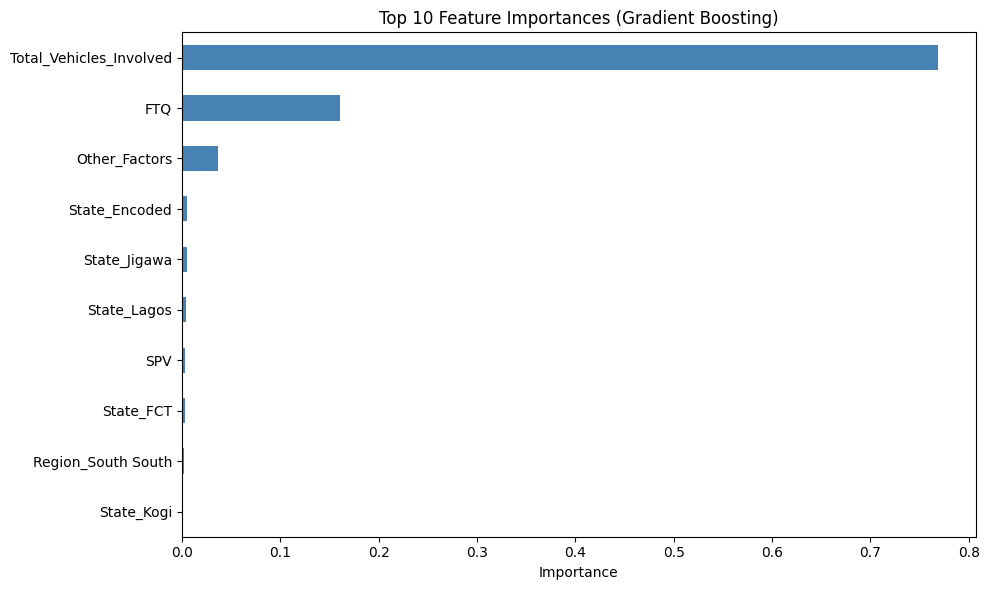

Train Score: 99.30120417722613 %
Test Score: 93.45940671899885 %


In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1. Load the dataset from the provided CSV content
# ------------------------------------------------------------


df = pd.read_csv("Nigeria Crash Data P.csv")

# ------------------------------------------------------------
# 2. Define feature columns (no target leakage)
# ------------------------------------------------------------
base_features = [
    'Total_Vehicles_Involved', 'SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors',
    'Year', 'Quarter_Num', 'Quarter_Sin', 'Quarter_Cos'
]
state_dummies = [col for col in df.columns if col.startswith('State_')]
region_dummies = [col for col in df.columns if col.startswith('Region_') and col != 'Region_Encoded']

feature_cols = base_features + state_dummies + region_dummies

X = df[feature_cols].copy()
y = df['Total_Crashes'].copy()

# ------------------------------------------------------------
# 3. Time‑based train / test split (train: <= Q4 2022, test: 2023–Q1 2024)
# ------------------------------------------------------------
df['order'] = pd.to_datetime(df['Quarter_Date'])
train_mask = df['order'] < '2023-01-01'
X_train, X_test = X[train_mask], X[~train_mask]
y_train, y_test = y[train_mask], y[~train_mask]

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples:     {X_test.shape[0]}\n")

# ------------------------------------------------------------
# 4. Train Gradient Boosting Regressor
# ------------------------------------------------------------
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

# ------------------------------------------------------------
# 5. Evaluate
# ------------------------------------------------------------
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regressor Performance (test set):")
print(f"MAE  (crashes): {mae:.2f}")
print(f"RMSE (crashes): {rmse:.2f}")
print(f"R²            : {r2:.3f}\n")

# ------------------------------------------------------------
# 6. Feature Importance (top 10)
# ------------------------------------------------------------
importances = pd.Series(gbr.feature_importances_, index=feature_cols)
top10 = importances.nlargest(10).sort_values()

plt.figure(figsize=(10, 6))
top10.plot.barh(color='steelblue')
plt.title('Top 10 Feature Importances (Gradient Boosting)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()
Train_Score = gbr.score(X_train, y_train)
Test_Score = gbr.score(X_test, y_test)
print("Train Score:", Train_Score * 100 , "%")
print("Test Score:", Test_Score * 100 , "%")